# Import modules, packages and dependencies

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn import preprocessing #used to normalize the data

# Load data

In [2]:
data ="heart 2.csv"
heart = pd.read_csv(data)

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart = heart.iloc[:,[0,1,2,3,5,6,7,12]]

In [5]:
#Rename :
heart.columns = ['age','sex','chpain',
                     'systod','bsugcd','ecgcd','hratecd','disease']

In [6]:
heart.dtypes

age        int64
sex        int64
chpain     int64
systod     int64
bsugcd     int64
ecgcd      int64
hratecd    int64
disease    int64
dtype: object

In [7]:
heart = heart.iloc[:,[0,1,2,3,5,6,7,12]]

IndexError: positional indexers are out-of-bounds

In [ ]:
heart.dtypes

In [76]:
heart.columns = ['age','sex','cp',
                     'trestbps','fbs','restecg','thalach','thal']

In [77]:
#Rename :
heart.columns = ['age','sex','chpain',
                     'systod','bsugcd','ecgcd','hratecd','disease']

In [78]:
heart.dtypes

age        int64
sex        int64
chpain     int64
systod     int64
bsugcd     int64
ecgcd      int64
hratecd    int64
disease    int64
dtype: object

# Data Preprocessing
# Data binning

In [65]:
bin = [20, 40, 60, 80]
label = [1, 2, 3]
heart['age'] = pd.cut(heart['age'], bin, labels = label)

In [44]:
bin = [90, 110, 130, 150, 170,200]
label = [1, 2, 3, 4, 5]
heart['systod'] = pd.cut(heart['systod'], bin, labels = label)

In [45]:
bin = [70, 110, 150, 190]
label = [1, 2, 3]
heart['hratecd'] = pd.cut(heart['hratecd'], bin, labels = label)

In [46]:
heart.head()

,age,sex,chpain,systod,bsugcd,ecgcd,hratecd,disease
0,3,1,3,3,1,0,2,1
1,1,1,2,2,0,1,3,2
2,2,0,1,2,0,0,3,2
3,2,1,1,2,0,1,3,2
4,2,0,0,2,0,1,3,2


In [19]:
heart["bsugcd"].value_counts()

0    258
1     45
Name: bsugcd, dtype: int64

In [20]:
heart["systod"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: systod, dtype: int64

In [21]:
bin = [90, 110, 130, 150, 170,200]
label = [1, 2, 3, 4, 5]
heart['systod'] = pd.cut(heart['systod'], bin, labels = label)

In [22]:
heart['systod']

0      3
1      2
2      2
3      2
4      2
      ..
298    3
299    1
300    3
301    2
302    2
Name: systod, Length: 303, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [23]:
heart.head()

,age,sex,chpain,systod,bsugcd,ecgcd,hratecd,disease
0,3,1,3,3,1,0,150,1
1,1,1,2,2,0,1,187,2
2,2,0,1,2,0,0,172,2
3,2,1,1,2,0,1,178,2
4,2,0,0,2,0,1,163,2


In [24]:
heart["ecgcd"].value_counts()

1    152
0    147
2      4
Name: ecgcd, dtype: int64

In [25]:
heart["hratecd"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: hratecd, Length: 91, dtype: int64

In [27]:
heart["hratecd"]

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: hratecd, Length: 303, dtype: int64

In [26]:
heart["disease"].value_counts()

2    166
3    117
1     18
0      2
Name: disease, dtype: int64

In [28]:
bin = [70, 110, 150, 190]
label = [1, 2, 3]
heart['hratecd'] = pd.cut(heart['hratecd'], bin, labels = label)

In [33]:
heart.head()

,age,sex,chpain,systod,bsugcd,ecgcd,hratecd,disease
0,3,1,3,3,1,0,2,1
1,1,1,2,2,0,1,3,2
2,2,0,1,2,0,0,3,2
3,2,1,1,2,0,1,3,2
4,2,0,0,2,0,1,3,2


In [ ]:
heart = pd.DataFrame(heart) 
  
# saving the dataframe 
heart.to_csv(r'C:\Users\Real_05-12-2019\Dropbox\AI project\file1.csv', index=False) 


# Visualizing data based on 'systod' and 'hratecd'

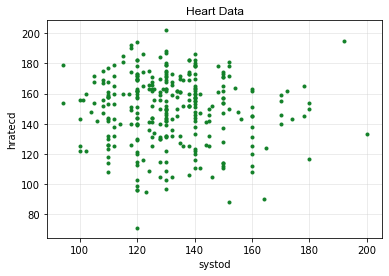

In [57]:
# plot the points
_ = plt.plot(heart['systod'], heart['hratecd'], marker = '.', linewidth=0, color = '#128128')
_ = plt.grid(which = 'major', color = '#cccccc', alpha = 0.45)
_ = plt.title('Heart Data', family = 'Arial' , fontsize=12)
_ = plt.xlabel('systod')
_ = plt.ylabel('hratecd')
_ = plt.show()

# Data Normalization 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
heart_features = heart[['systod', 'hratecd']]
heart_features = heart_features.values.astype('float32', copy = False)

In [10]:
heart_features_scaler = StandardScaler().fit(heart_features)
heart_features = heart_features_scaler.transform(heart_features)

# GaussianMixture cluster model python sklearn

In [14]:
from sklearn.metrics import silhouette_score

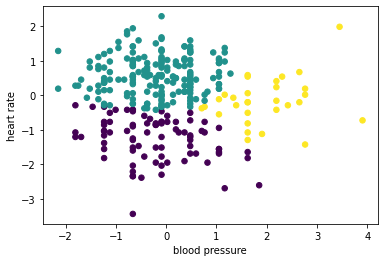

In [271]:
from sklearn.mixture import GaussianMixture

EM = GaussianMixture(n_components=3).fit(heart_features)
labels = EM.predict(heart_features)

plt.scatter(heart_features[:, 0], heart_features[:, 1], c=labels,s=30 ,cmap='viridis');
plt.xlabel('blood pressure')
plt.ylabel('heart rate')

probs = gmm.predict_proba(heart_features)

In [272]:
silhouette_score(heart_features,labels )

0.3738959

# Density based cluster model python sklearn

In [448]:
# Construct model
model = DBSCAN(eps = 0.5, min_samples = 3, metric= 'euclidean').fit(heart_features)
labels_d = model.labels_

In [452]:
silhouette_score(heart_features,labels_d )

0.36387095

In [453]:
# Separate outliers from clustered data
outliers_df = heart[model.labels_ == -1]
clusters_df = heart[model.labels_ != -1]

# Color outliers and clustered data
colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'red'

# Get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print(heart[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({0: 285, 1: 10, -1: 8})
     age  sex  chpain  systod  bsugcd  ecgcd  hratecd  disease
72    29    1       1     130       0      0      202        2
124   39    0       2      94       0      1      179        2
223   56    0       0     200       1      0      133        3
243   57    1       0     152       0      1       88        3
248   54    1       1     192       0      0      195        3
Number of clusters = 2


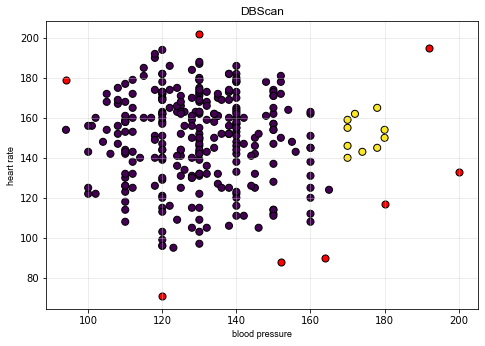

In [454]:
# Plot clusters and outliers
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(clusters_df['systod'], clusters_df['hratecd'], c = colors_clusters, edgecolors = 'black', s =50)
ax.scatter(outliers_df['systod'], outliers_df['hratecd'], c = color_outliers, edgecolors = 'black', s =50)

ax.set_xlabel('blood pressure', family = 'Arial' , fontsize=9)
ax.set_ylabel('heart rate', family = 'Arial' , fontsize=9)

plt.title('DBScan', family = 'Arial' , fontsize=12)
plt.grid(which = 'major', color = '#cccccc', alpha = 0.45)

plt.show()

# K-mean cluster model

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(heart_features)

KMeans(n_clusters=3)

In [27]:
silhouette_score(heart_features,kmeans.labels_ )

0.35872313

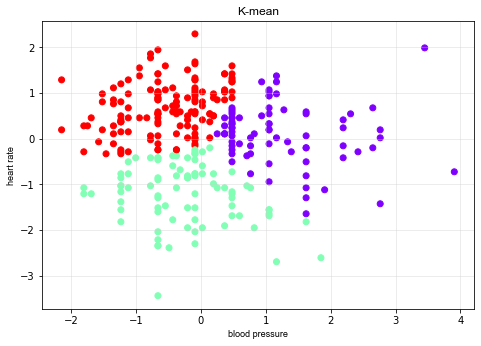

In [17]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(heart_features[:,0],heart_features[:,1], c=kmeans.labels_, cmap='rainbow')
ax.set_xlabel('blood pressure', family = 'Arial' , fontsize=9)
ax.set_ylabel('heart rate', family = 'Arial' , fontsize=9)

plt.title('K-mean', family = 'Arial' , fontsize=12)
plt.grid(which = 'major', color = '#cccccc', alpha = 0.45)

plt.show()

In [92]:
print(kmeans.cluster_centers_)

[[-0.31207553 -1.1113156 ]
 [ 1.1998934   0.09017212]
 [-0.5035115   0.74876976]]


In [93]:
print(kmeans.labels_)

[1 2 2 2 2 1 1 2 1 1 1 0 2 2 1 2 2 0 1 1 2 2 2 1 2 1 1 0 1 2 2 0 2 2 0 1 2
 1 1 1 1 2 2 0 2 2 2 1 0 1 2 2 0 2 2 2 2 2 2 2 0 2 2 0 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 0 2 2 2 2 0 2 2 2 2 0 0 1 2 2 2 1 1 2 2 2 0 1 1 2 2 1
 1 0 2 2 2 2 2 2 1 0 2 2 2 2 2 0 1 2 0 1 2 2 2 2 2 0 0 0 0 2 2 2 0 0 1 2 1
 2 2 1 0 1 1 1 0 2 2 0 2 2 2 2 2 2 1 0 1 2 1 0 2 2 2 0 0 2 1 0 0 0 0 2 2 1
 2 0 0 1 2 0 0 0 1 1 1 1 2 0 2 2 0 0 1 1 2 0 1 0 1 2 0 0 1 0 0 0 0 0 2 1 0
 2 1 0 0 0 0 1 0 2 1 1 0 0 2 2 2 2 2 1 1 1 0 0 2 2 1 1 1 0 0 0 0 1 1 0 0 1
 2 1 2 0 2 0 0 1 0 0 0 0 0 0 2 0 2 0 0 1 0 0 2 0 1 1 0 2 1 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 2]


# Filtered cluster 

In [36]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.clusterers import Clusterer, FilteredClusterer, ClusterEvaluation
from weka.filters import Filter
import weka.plot.graph as plg
import weka.plot.clusterers as plc

ModuleNotFoundError: No module named 'weka'

In [ ]:
    # load a dataset
    #iris_file = helper.get_data_dir() + os.sep + "iris.arff"
    #helper.print_info("Loading dataset: " + iris_file)
    #loader = Loader("weka.core.converters.ArffLoader")
    data = loader.load_file(heart)

    # remove class attribute
    #data.delete_last_attribute()

    # build a clusterer and output model
    helper.print_title("Training SimpleKMeans clusterer")
    clusterer = Clusterer(classname="weka.clusterers.SimpleKMeans", options=["-N", "3"])
    clusterer.build_clusterer(data)
    print(clusterer)
    helper.print_info("Evaluating on data")
    evaluation = ClusterEvaluation()
    evaluation.set_model(clusterer)
    evaluation.test_model(data)
    print("# clusters: " + str(evaluation.num_clusters))
    print("log likelihood: " + str(evaluation.log_likelihood))
    print("cluster assignments:\n" + str(evaluation.cluster_assignments))
    plc.plot_cluster_assignments(evaluation, data, inst_no=True)

    # using a filtered clusterer
    helper.print_title("Filtered clusterer")
    loader = Loader("weka.core.converters.ArffLoader")
    data = loader.load_file(iris_file)
    clusterer = Clusterer(classname="weka.clusterers.SimpleKMeans", options=["-N", "3"])
    remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "last"])
    fclusterer = FilteredClusterer()
    fclusterer.clusterer = clusterer
    fclusterer.filter = remove
    fclusterer.build_clusterer(data)
    print(fclusterer)

    # load a dataset incrementally and build clusterer incrementally
    helper.print_title("Incremental clusterer")
    loader = Loader("weka.core.converters.ArffLoader")
    iris_inc = loader.load_file(iris_file, incremental=True)
    clusterer = Clusterer("weka.clusterers.Cobweb")
    remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "last"])
    remove.inputformat(iris_inc)
    iris_filtered = remove.outputformat()
    clusterer.build_clusterer(iris_filtered)
    for inst in loader:
        remove.input(inst)
        inst_filtered = remove.output()
        clusterer.update_clusterer(inst_filtered)
    clusterer.update_finished()
    print(clusterer.to_commandline())
    print(clusterer)
    print(clusterer.graph)
    plg.plot_dot_graph(clusterer.graph)

    # partial classname
    helper.print_title("Creating clusterer from partial classname")
    clsname = ".SimpleKMeans"
    clusterer = Clusterer(classname=clsname)
    print(clsname + " --> " + clusterer.classname)